# Question 3: Common Variance

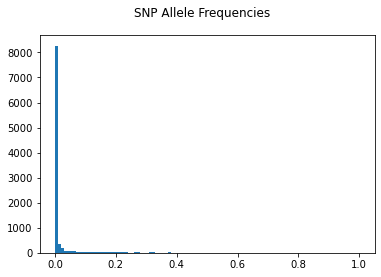

In [2]:
# Setting up: copying from Question 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

snp_file = open("matrix_1kg.txt", 'r')
raw_hist = pd.read_csv(snp_file, sep = '\t')

raw_hist = raw_hist.iloc[:,4:]

sum_alleles=raw_hist.sum(axis=1)
total_samples = raw_hist.shape[1]
altern_allele_freq = sum_alleles/(total_samples*2)

fig, ax = plt.subplots()
hist = ax.hist(altern_allele_freq, bins=100)
fig.suptitle("SNP Allele Frequencies")
plt.show()

Subset the data frame to "common variation", where the alternate allele frequency is between 0.05 and 0.95.


In [11]:
altern_allele_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

In [17]:
subsec_upper = altern_allele_freq < 0.95
subsec_lower = altern_allele_freq > 0.05
subsec = subsec_upper & subsec_lower
subsec

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [18]:
comm_var=altern_allele_freq.loc[subsec]
comm_var # for oommon variance

20      0.080259
32      0.595761
38      0.405612
41      0.094388
46      0.097527
          ...   
9957    0.841837
9959    0.115973
9974    0.180730
9975    0.810047
9980    0.077708
Length: 986, dtype: float64

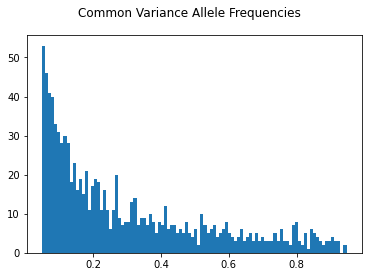

In [19]:
fig, ax = plt.subplots()
hist = ax.hist(comm_var, bins=100)
fig.suptitle("Common Variance Allele Frequencies")
plt.show()

# Question 4: PCA

In [24]:
# use rows/alleles included in comm var to make subsec of raw_hist
raw_hist_comm = raw_hist.loc[subsec]
# transpose to group samples based on genotype
pca_input = raw_hist_comm.T
pca_input


,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


In [25]:
pca_input.mean(axis = 0)
pca_input.var(axis = 0)
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)
pca_input_standardized.var(axis = 0)
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output.shape

(2548, 10)

In [26]:
pca_output

array([[-6.14493037, -9.81856665, -1.54593132, ...,  0.61092578,
        -3.13440378, -3.85592656],
       [-6.13388414, -8.6318292 ,  2.5574393 , ...,  4.52617221,
        -2.40549239,  1.82289693],
       [-6.23847319, -7.97187003, -0.74603   , ..., -2.47592877,
         0.74078545, -1.200398  ],
       ...,
       [-4.09694721, -2.82736143, -4.18029049, ...,  0.35540232,
         3.3717818 ,  4.53602216],
       [-6.26346243, -2.58507979, -4.22595905, ...,  0.03965841,
         2.04189187,  1.44899685],
       [-3.17677867, -0.91694963, -6.45111066, ...,  2.83518947,
         1.40856878,  3.34055263]])

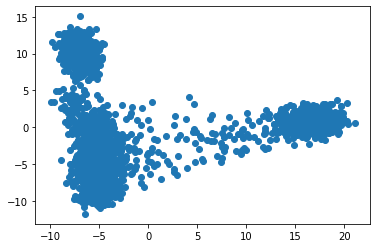

In [27]:
pca_output_df = pd.DataFrame(data = pca_output, 
                             columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])

In [28]:
pca_output_df['SAMPID'] = pca_input.index
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SAMPID
0,-6.144930,-9.818567,-1.545931,-5.393105,-0.512757,-0.362492,0.900898,0.610926,-3.134404,-3.855927,HG00096
1,-6.133884,-8.631829,2.557439,-3.896361,0.314795,-2.295317,2.359255,4.526172,-2.405492,1.822897,HG00097
2,-6.238473,-7.971870,-0.746030,-4.014751,-0.941541,4.044889,-0.386114,-2.475929,0.740785,-1.200398,HG00099
3,-5.051218,-7.008727,2.805178,-4.763326,4.387126,0.312158,-0.511325,-2.234036,0.369906,-0.099221,HG00100
4,-6.634383,-8.543670,3.071659,-1.594004,-4.363957,0.819066,0.996107,-4.298419,0.593101,-0.950831,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665736,3.300408,-0.182854,-0.773204,-3.077546,0.553134,0.059185,0.279736,NA21137
2544,-6.295888,-3.116491,-5.555740,3.334867,3.337237,3.626148,-1.534861,-3.096569,-2.354834,0.986116,NA21141
2545,-4.096947,-2.827361,-4.180290,3.696108,1.549992,0.348593,-1.251594,0.355402,3.371782,4.536022,NA21142
2546,-6.263462,-2.585080,-4.225959,3.893938,-3.942747,-2.045210,-0.991948,0.039658,2.041892,1.448997,NA21143
